# Problem Sheet 1


In this problem sheet, you are expected to
- Import the datas from either online/local data source;
- Perform exploratory data analysis, data imputation;
- Divide sp500 into train set and test set;
- Experience how model fitting, model evaluation works (without going into the "blackbox")

### Question 1 : sp500 Importation

1. Import the S&P500 stocks price datas (all_stocks_5yr.csv) as pandas Dataframe into your notebook, from the source Dataset: https://www.kaggle.com/camnugent/sandp500, name this data frame as "sp500".

In [1]:
import pandas as pd
sp500 = pd.read_csv('all_stocks_5yr.csv')
sp500.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### Question 2 : Data Exploration


2. What is the shape of your data? (how many rows and columns?)

In [2]:
sp500.shape

(619040, 7)

3. Are there missing values in the data? What is missing?

In [3]:
sp500.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

4. What are the tickers of S&P500 index? (You can find them in the column "name"). Which ticker stands for Apple ?

In [4]:
tickers = sp500['Name'].unique()
print(f'The S&P500 contains {len(tickers)} stocks. First 10 ticker examples:')
print(tickers[:10])  # There are so many! I choose to display the first 10 tickers here.

# Find Apple's stock ticker
apple_data = sp500[ sp500['Name'].str.contains('AAPL|Apple', case=False)]  # Dataframe
if not apple_data.empty:
    apple_ticker = apple_data['Name'].iloc[0]
    print(f'\n  The stock ticker for Apple is: {apple_ticker}')
else:
    print('No stock data found for Apple')  # Wrote an 'else', just in case.

The S&P500 contains 505 stocks. First 10 ticker examples:
['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM']

  The stock ticker for Apple is: AAPL


5. What is the starting date and last date of this sp500 data?

In [5]:
sp500['date'] = pd.to_datetime(sp500['date'])   # Convert the date column to datetime format

start_date = sp500['date'].min()   # Earliest date
end_date = sp500['date'].max()    # Latest date

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 2013-02-08 00:00:00
End date: 2018-02-07 00:00:00


6.  Plot a line chart showing Apple stock prices from 2014-01-01 to 2016-12-31, including open/high/low/closed prices, in the same chart.

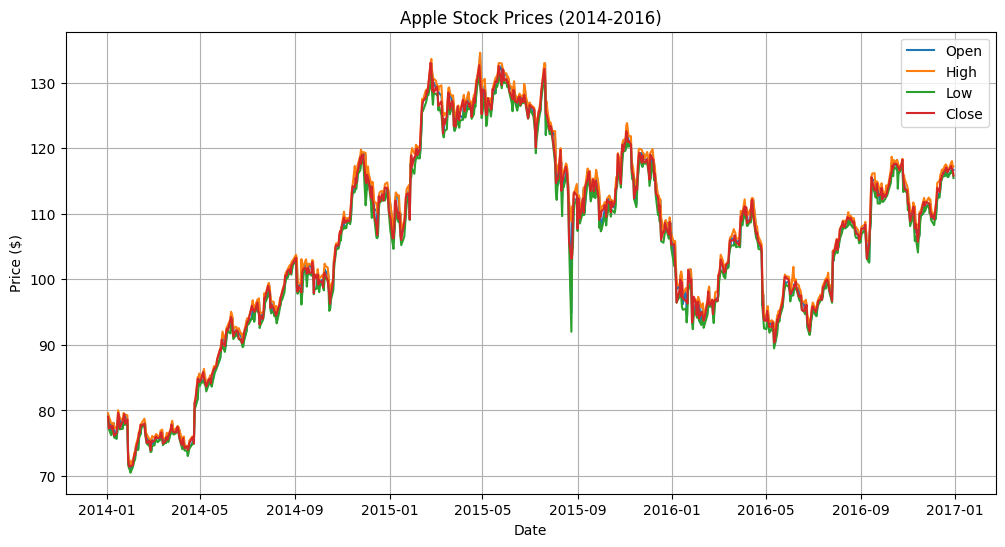

In [6]:
import matplotlib.pyplot as plt

# Data only for Apple
apple_data = sp500[sp500['Name'] == 'AAPL']

# Filter data for the years 2014 to 2016
q6 = (apple_data['date'] >= '2014-01-01') & (apple_data['date'] <= '2016-12-31')
apple_data = apple_data.loc[q6]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(apple_data['date'], apple_data['open'], label='Open')
plt.plot(apple_data['date'], apple_data['high'], label='High')
plt.plot(apple_data['date'], apple_data['low'], label='Low')
plt.plot(apple_data['date'], apple_data['close'], label='Close')

plt.title('Apple Stock Prices (2014-2016)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

7. Which are the top 5 stocks whose closed prices have highest positive/negative correlation with that of Apple?

In [7]:
'''In this question, I use two methods to analyze the correlation, which are Pearson and Spearman correlation, since the question
doesn't specify the speicific method to use.
Also I set it to be a function, so that I can call it again if I need to later.
'''

# Pearson: Measures linear relationship, range [-1,1]
# Spearman: Measures monotonic relationship, more robust to outliers

# Get Apple's closing prices
apple_close = sp500[sp500['Name'] == 'AAPL'][['date', 'close']].rename(columns = {'close': 'AAPL_close'})

# Merge with all stocks' closing prices
all_close = pd.merge(sp500, apple_close, on ='date', how ='inner')

# Group by stock name and compute correlations with AAPL
corr_data = all_close.groupby('Name', group_keys=False).apply(
    lambda x: pd.Series({
        'Pearson': x['close'].corr(x['AAPL_close']),
        'Spearman': x['close'].corr(x['AAPL_close'], method ='spearman')
    }), include_groups=False
).reset_index()

# Pearson Correlation Output
print("Pearson Correlation Results: ")
print("\n Top 5 Most Positively Correlated Stocks:")

posi_pearson = corr_data[corr_data['Name'] != 'AAPL'].sort_values('Pearson', ascending=False).head(5)
for i, (stock, pearson, _) in enumerate(zip(
    posi_pearson['Name'], posi_pearson['Pearson'], posi_pearson['Spearman']), 1):
    print(f"{i}. {stock}: {pearson : .4f}")

print("\n Top 5 Most Negatively Correlated Stocks:")
neg_pearson = corr_data[corr_data['Name'] != 'AAPL'].sort_values('Pearson').head(5)
for i, (stock, pearson, _) in enumerate(zip(
    neg_pearson['Name'], neg_pearson['Pearson'], neg_pearson['Spearman']), 1):
    print(f"{i}. {stock}: {pearson : .4f}")

print("\n" + "=="*50)

# Spearman Correlation Output
print("\n Spearman Correlation Results: ")
print("\n Top 5 Most Positively Correlated Stocks:")
posi_spearman = corr_data[corr_data['Name'] != 'AAPL'].sort_values('Spearman', ascending=False).head(5)
for i, (stock, _, spearman) in enumerate(zip(
    posi_spearman['Name'], posi_spearman['Pearson'], posi_spearman['Spearman']), 1):
    print(f"{i}. {stock}: {spearman : .4f}")

print("\n Top 5 Most Negatively Correlated Stocks:")
neg_spearman = corr_data[corr_data['Name'] != 'AAPL'].sort_values('Spearman').head(5)
for i, (stock, _, spearman) in enumerate(zip(
    neg_spearman['Name'], neg_spearman['Pearson'], neg_spearman['Spearman']), 1):
    print(f"{i}. {stock}: {spearman : .4f}")

Pearson Correlation Results: 

 Top 5 Most Positively Correlated Stocks:
1. ANTM:  0.9687
2. MAR:  0.9642
3. MCO:  0.9574
4. ALL:  0.9507
5. RCL:  0.9489

 Top 5 Most Negatively Correlated Stocks:
1. MAT: -0.9318
2. UA: -0.9215
3. EVHC: -0.8791
4. RRC: -0.8109
5. DISCA: -0.7946


 Spearman Correlation Results: 

 Top 5 Most Positively Correlated Stocks:
1. SWKS:  0.9642
2. MAR:  0.9618
3. ANTM:  0.9478
4. MCO:  0.9464
5. FTV:  0.9455

 Top 5 Most Negatively Correlated Stocks:
1. UA: -0.9348
2. EVHC: -0.9346
3. MAT: -0.9200
4. RRC: -0.7942
5. DISCA: -0.7214


### Question 3 : Data Preparation



8. Deal with the missing data, if there are any of them.

In [8]:
# Fill in Missing Values, use the forward fill method.
sp500.ffill(inplace=True)

# Check if there are any missing values.
sp500.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

9. Extract the data of Apple, name them as "apple"

In [9]:
apple = sp500[sp500['Name'] == 'AAPL'].copy()
apple.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


10. Prepare data for training. Write a **pipeline** which consists:


*   An **imputater**: It fills in the missing data with the average of the previous day and the next day.  
*   An **attributesadder**: It adds the prices of previous 5 days as new attributes.
*   An **scaler**: It scales everything numerical data into values between 0 and 1.






In [10]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
# sp500 = pd.read_csv('all_stocks_5yr.csv')
# apple_data = sp500[sp500['Name'] == 'AAPL']
apple = apple.sort_values('date')  # Sort by date
raw_df = apple.copy()

class Imputer(BaseEstimator, TransformerMixin):
    """
    An Imputater: 
    It fills in the missing data with the average of 
    the previous day and the next day. 
    """
    def __init__(self, method='linear', limit_direction='both'):
        self.method = method
        self.limit_direction = limit_direction

    def fit(self, X, y=None):
        # No statistics need to be calculated in advance, 
        # since it depends on the adjacent values of X.
        self.is_fitted_ = True
        return self
    def transform(self, X):
        # Use the linear interpolation method to interpolate X
        # 'limit_direction' parameter is set to 'both', 
        # which is the average of both sides of the missing value.
        return X.interpolate(method =self.method, limit_direction =self.limit_direction)
    
# I wrote a file to conduct an unit test on Imputater and named it test1.py

In [11]:
class Attributesadder(BaseEstimator, TransformerMixin):
    """
    An Attributesadder:
    It adds the prices of previous 5 days as new attributes.
    """
    def __init__(self, previousday=5):
        self.previousday = previousday

    def fit(self, X, y=None):
        # Feature addition does not require pre-calculated parameters
        self.is_fitted_ = True
        return self
    def transform(self, X):
        X = X.copy()
        for i in range(1, 6):
            X[f'newclose_{i}day'] = X['close'].shift(i)
        return X #.dropna()
        # Delete the rows containing missing values later
        # because the data of the first 5 days is unavailable at the beginning of the dataset.

In [12]:
class Scaler(BaseEstimator, TransformerMixin):
    """
    An Scaler: 
    It scales everything numerical data into values between 0 and 1.
    """
    def __init__(self):
        self.scaler = MinMaxScaler(feature_range = (0, 1) )
    #The transformation is given by:
    # X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    # X_scaled = X_std * (max - min) + min
    # where min, max = feature_range.
    def fit(self, X, y=None):
        # Call MinMaxScaler to calculate and store:
        # The minimum and the maximum value of each feature
        self.scaler.fit(X)
        return self
    def transform(self, X):
        return self.scaler.transform(X)




# Create a pipeline to process the data
numeric_features = ['open', 'high', 'low', 'close', 'volume']
pipeline = Pipeline([
    ('Step1', Imputer()),  
    ('Step2', Attributesadder()),
    ('Step3', Scaler())
])



11. Divide the datas into train_set and test_set. Remember we are dealing with time series data. Refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) for details.

In [13]:
from sklearn.model_selection import TimeSeriesSplit
original_5 = ['open', 'high', 'low', 'close', 'volume']
clean_original_5 = pipeline.fit_transform(raw_df[original_5])

# Convert the values back to a DataFrame
clean_df = pd.DataFrame(clean_original_5, 
                       columns=original_5 + [f'newclose_{i}day' for i in range(1,6)])
clean_df['date'] = pd.to_datetime(raw_df['date'].iloc[5:].reset_index(drop=True))
clean_df['Stock_name'] = 'AAPL'  # add a column for the stock name

# In order to predict the price on the next day in the future, 
# we need to move the target variable backward by one days
clean_df['future5_close'] = clean_df['close'].shift(-1)

# Delete the lines containing NaN values.
# Since the shift operation, the future_close in the last 5 lines will be NaN.
clean_df.dropna(inplace=True)

# Split the data into training and testing sets
data_split = TimeSeriesSplit(n_splits=2, test_size=int(len(clean_df)*0.2)) # 80% of the data is used for training and 20% for testing
train_index, test_index = list(data_split.split(clean_df))[-1]

# Save the training and testing sets to CSV files
clean_df.iloc[train_index].to_csv('train.csv', index=False)
clean_df.iloc[test_index].to_csv('test.csv', index=False)

# Let's do some basic checks, hopefully they are correct ! ! ! ! ! ! ! ! ! ! ! ! !
print(f"Train date: {clean_df.iloc[train_index].date.min()} to {clean_df.iloc[train_index].date.max()}")
print(f"Test date: {clean_df.iloc[test_index].date.min()} to {clean_df.iloc[test_index].date.max()}")

Train date: 2013-02-25 00:00:00 to 2017-02-10 00:00:00
Test date: 2017-02-13 00:00:00 to 2018-02-07 00:00:00


### Question 4 : Prediction, and Evaluation




12. Using the Linear Regression Model to predict the closed price of Apple by its price in the last 5 days.


*   Report the R-square value
*   Report the mean squared error.
*   Report the equation of regression. In particular, what is the coefficient before the price of the previous day?     



In [14]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score, mean_squared_error

# read the data from csv files
train_set = pd.read_csv('train.csv') #.dropna()  # Since we already deleted the rows containing NaN values in the pipeline: clean_df.dropna(inplace=True)
test_set = pd.read_csv('test.csv') #.dropna()

# Prepare the features (X) and target variables (y)
# of the training set and test set for the linear regression model.
X_train = train_set[[f'newclose_{i}day' for i in range(1, 6)]]
y_train = train_set['close']
X_test = test_set[[f'newclose_{i}day' for i in range(1, 6)]]
y_test = test_set['close']


# create a linear regression model
model = LR()
model.fit(X_train, y_train)

# predict the target variable for the test set
y_predict = model.predict(X_test)

# Performance standard
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)


# Output
print(f"R-square value: {r2:.4f}")
print(f"Mean squared error: {mse:.6f}")

# Regression equation
print("\n Regression equation:")
# y = b0 + b1*x1 + b2*x2 + ... + bn*xn
coefficients = model.coef_
intercept = model.intercept_
equation = f"Closed price of Apple = {intercept : .4f}"
for i, coef in enumerate(coefficients, 1): # start from 1, i.e. newclose_1day
    equation += f" + {coef : .4f}*newclose_{i}day"

print(equation)

# Strict answer to user's question
print("\n The coefficient before the price of the previous day (newclose_1day) is:", f"{coefficients[0] : .4f}")

R-square value: 0.9801
Mean squared error: 0.000205

 Regression equation:
Closed price of Apple =  0.0013 +  1.0206*newclose_1day + -0.0360*newclose_2day +  0.0026*newclose_3day + -0.0172*newclose_4day +  0.0277*newclose_5day

 The coefficient before the price of the previous day (newclose_1day) is:  1.0206


13. Using the Decision Tree Regression Model to predict the closed price of Apple by its price in the last 5 days.


*   Report the R-square value
*   Report the mean squared error.
*   Report the features importance.

In [15]:
from sklearn.tree import DecisionTreeRegressor as DTR

# read the data from csv files
# train_set = pd.read_csv('train.csv').dropna()
# test_set = pd.read_csv('test.csv').dropna()

# X_train = train_set[[f'newclose_{i}day' for i in range(1, 6)]]
# y_train = train_set['close']
# X_test = test_set[[f'newclose_{i}day' for i in range(1, 6)]]
# y_test = test_set['close']

# Create decision tree regressor
dt_regressor = DTR(random_state=42, max_depth=5)  # Set a random state for reproducibility and limit the depth of the tree to avoid overfitting
dt_regressor.fit(X_train, y_train)

# Prediction
y_predict = dt_regressor.predict(X_test)


r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
features = [f'newclose_{i}day' for i in range(1, 6)]
feature_importance = dt_regressor.feature_importances_


# Output
print(f"R-square value: {r2 : .4f}")
print(f"Mean squared error: {mse : .6f}")
print("\n Features importance:")
for i, importance in enumerate(feature_importance):
    print(f"{features[i]}: {importance : .4f}")


R-square value: -4.0867
Mean squared error:  0.052251

 Features importance:
newclose_1day:  0.2300
newclose_2day:  0.0000
newclose_3day:  0.0000
newclose_4day:  0.0002
newclose_5day:  0.7697


14. Now instead of predict the price of the next day, predict the price after 5 days, using the two models mentioned before. What are their performances?

In [16]:
# Convert the values back to a DataFrame
clean_df = pd.DataFrame(clean_original_5, 
                       columns=original_5 + [f'newclose_{i}day' for i in range(1,6)])
clean_df['date'] = pd.to_datetime(raw_df['date'].iloc[5:].reset_index(drop=True))
clean_df['Stock_name'] = 'AAPL'  # add a column for the stock name

# In order to predict the price on the fifth day in the future, 
# we need to move the target variable backward by five days
clean_df['future5_close'] = clean_df['close'].shift(-5)

# Delete the lines containing NaN values.
# Since the shift operation, the future_close in the last 5 lines will be NaN.
clean_df.dropna(inplace=True)

# Split the data into training and testing sets
tscv = TimeSeriesSplit(n_splits=2, test_size=int(len(clean_df)*0.2)) # 80% of the data is used for training and 20% for testing
train_index, test_index = list(tscv.split(clean_df))[-1]

# Here, I save the data of train and test in memory 
# instead of generating new csv files, just for convenience.
train_set = clean_df.iloc[train_index]
test_set = clean_df.iloc[test_index]

# Let's do some basic checks, hopefully they are correct ! ! ! ! ! ! ! ! ! ! ! ! !
print(f"Train date: {clean_df.iloc[train_index].date.min()} to {clean_df.iloc[train_index].date.max()}")
print(f"Test date: {clean_df.iloc[test_index].date.min()} to {clean_df.iloc[test_index].date.max()}")
print("=="*50)



# Prepare the features (X) and target variables (y)
# of the training set and test set for the linear regression model.
X_train = train_set[[f'newclose_{i}day' for i in range(1, 6)]]
y_train = train_set['future5_close']
X_test = test_set[[f'newclose_{i}day' for i in range(1, 6)]]
y_test = test_set['future5_close']

# create a linear regression model
model = LR()
model.fit(X_train, y_train)

# predict the target variable for the test set
y_predict = model.predict(X_test)

# Performance standard
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)


# Output
print("\n Regression Performance:")
print(f"R-square value: {r2 : .4f}")
print(f"Mean squared error: {mse : .6f}")

# Regression equation
print("\n Regression equation:")
# y = b0 + b1*x1 + b2*x2 + ... + bn*xn
coefficients = model.coef_
intercept = model.intercept_
equation = f"Closed price of Apple at 5th day= {intercept : .4f}"
for i, coef in enumerate(coefficients, 1): # start from 1, i.e. newclose_1day
    equation += f" + {coef : .4f}*newclose_{i}day"

print(equation)

# Strict answer to user's question
print("\n The coefficient before the price of the previous day (newclose_1day) is:", f"{coefficients[0] : .4f}")


print("=="*50)
# Create decision tree regressor
dt_regressor = DTR(random_state=42, max_depth=5)  # Set a random state for reproducibility and limit the depth of the tree to avoid overfitting
dt_regressor.fit(X_train, y_train)

# Prediction
y_predict = dt_regressor.predict(X_test)


r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
features = [f'newclose_{i}day' for i in range(1, 6)]
feature_importance = dt_regressor.feature_importances_


# Output
print("\n Decision Tree Performance:")
print(f"R-square value: {r2 : .4f}")
print(f"Mean squared error: {mse : .6f}")
print("\n Features importance:")
for i, importance in enumerate(feature_importance):
    print(f"{features[i]}: {importance : .4f}")

Train date: 2013-02-25 00:00:00 to 2017-02-10 00:00:00
Test date: 2017-02-13 00:00:00 to 2018-02-07 00:00:00

 Regression Performance:
R-square value:  0.8530
Mean squared error:  0.001408

 Regression equation:
Closed price of Apple at 5th day=  0.0080 +  0.9492*newclose_1day +  0.0362*newclose_2day + -0.0193*newclose_3day +  0.0358*newclose_4day + -0.0161*newclose_5day

 The coefficient before the price of the previous day (newclose_1day) is:  0.9492

 Decision Tree Performance:
R-square value: -5.8053
Mean squared error:  0.065202

 Features importance:
newclose_1day:  0.2179
newclose_2day:  0.0000
newclose_3day:  0.0025
newclose_4day:  0.7794
newclose_5day:  0.0002
